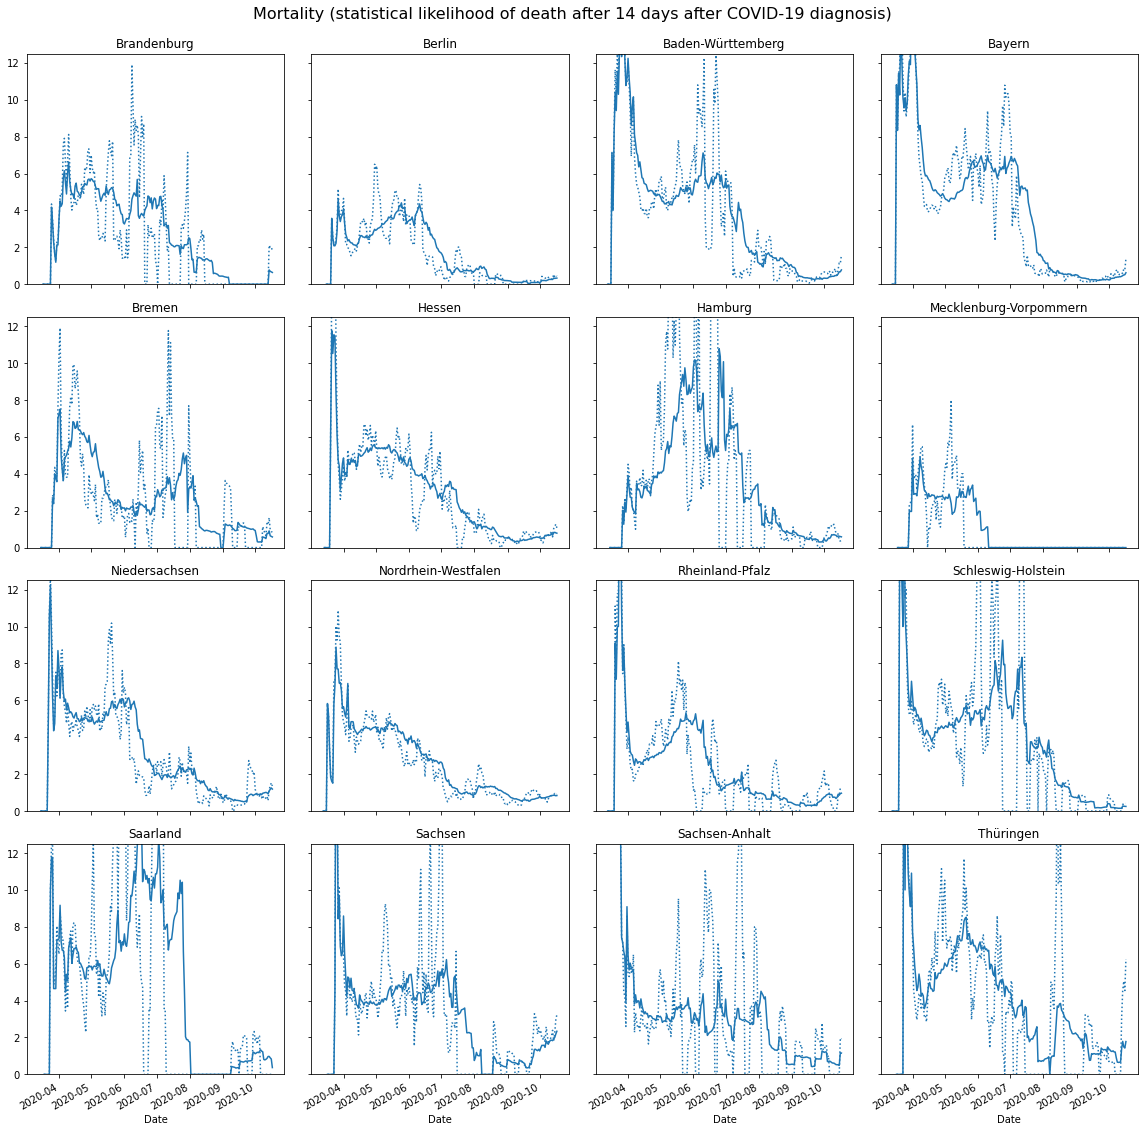

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scrape import entorb

fst = {    
    "BB": "Brandenburg",   
    "BE": "Berlin",  
    "BW": "Baden-Württemberg",  
    "BY": "Bayern",  
    "HB": "Bremen",    
    "HE": "Hessen",   
    "HH": "Hamburg",   
    "MV": "Mecklenburg-Vorpommern",  
    "NI": "Niedersachsen",    
    "NW": "Nordrhein-Westfalen",  
    "RP": "Rheinland-Pfalz",  
    "SH": "Schleswig-Holstein",  
    "SL": "Saarland",  
    "SN": "Sachsen",     
    "ST": "Sachsen-Anhalt",   
    "TH": "Thüringen", 
}

fig, axes = plt.subplots(ncols=4, nrows=4, sharey=True, sharex=True) 
 
for num, (ax, area) in enumerate(zip(axes.flat, fst)): 
    df = entorb.to_dataframe(area)   
    df['Mortalty_Weekly'] = df['Deaths_New'].rolling('7D').sum() * 100 / df['Cases_New'].rolling('7D').sum().shift(14)   
    df['Mortalty_Monthly'] = df['Deaths_New'].rolling('30D').sum() * 100 / df['Cases_New'].rolling('30D').sum().shift(14)    
    p = ax.plot('Date',       
                'Mortalty_Weekly',     
                data=df.reset_index(),    
                marker='',          
                linestyle=':',        
                label=fst[area])  
    ax.plot('Date',         
            'Mortalty_Monthly',     
            data=df.reset_index(),     
            marker='',         
            linestyle='-',         
            color=p[0].get_color(),     
            label=fst[area])   
    ax.set_xlabel('Date')    
    #ax.set_xscale('symlog')   
    ax.set_title(fst[area])    
    #ax.set_ylabel('Mortalty (%)')  
    ax.set_ylim(min(0,max(df['Mortalty_Monthly'])))   
    #ax.set_yscale('symlog')   
    #ax.legend()  
    #ax.grid() 
fig.suptitle("Mortality (statistical likelihood of death after 14 days after COVID-19 diagnosis)\n", fontsize=16) 
fig.set_size_inches(16,16) 
fig.autofmt_xdate() 
fig.tight_layout() 
fig.set_facecolor('w') 
plt.show()